You now have a pretty varied suite of clustering and clustering evaluation methods; we'd be remiss if we didn't give you the opportunity to try them out on some real data. So here we go!

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [87]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

%matplotlib inline

In [76]:
df = pd.read_csv("C:\\Users\\Chris\\Documents\\Python Scripts\\Thinkful File Examples\\BostonMarathon2014.csv")

In [77]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [78]:
#drop wheelchairs
df = df.loc[df['official'] > 120]

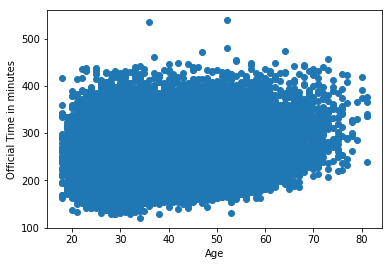

In [80]:
# Scatter plot of all Boston finishers by age/official time
plt.scatter(df['age'], df['official'])
plt.xlabel('Age')
plt.ylabel('Official Time in minutes')
plt.show()

In [109]:
# Used a sample of only 10% of the field
X = df.sample(frac=.1, random_state=123)

In [110]:
X_train = X[['age', 'official']]

In [111]:
from sklearn.preprocessing import normalize
X_train_norm = normalize(X_train, axis=0)

Number of estimated clusters: 32


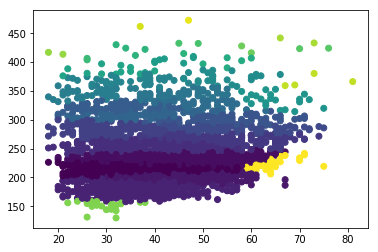

In [112]:
# Mean_shift
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_train, quantile=0.5, n_samples=1000)
ms = MeanShift(bandwidth=10, bin_seeding=True)
ms.fit(X_train)
cluster_centers = ms.cluster_centers_
labels = ms.predict(X_train)
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(X_train['age'], X_train['official'], c=labels)
plt.show()

Number of estimated clusters: 4


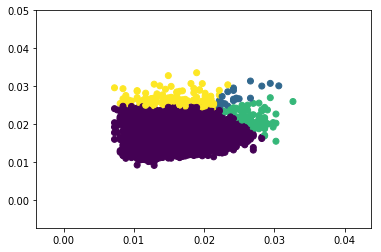

In [114]:
# Mean_shift Normalized
from sklearn.cluster import MeanShift, estimate_bandwidth


bandwidth = estimate_bandwidth(X_train_norm, quantile=0.1, n_samples=200)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train_norm)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(X_train_norm[:,0], X_train_norm[:,1], c=labels)
plt.show()

In [102]:
X_train_norm

array([[0.01411344, 0.01405479],
       [0.00725834, 0.02044269],
       [0.00927455, 0.02642202],
       ...,
       [0.02701715, 0.01691478],
       [0.01854909, 0.01427862],
       [0.01290372, 0.0251551 ]])

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


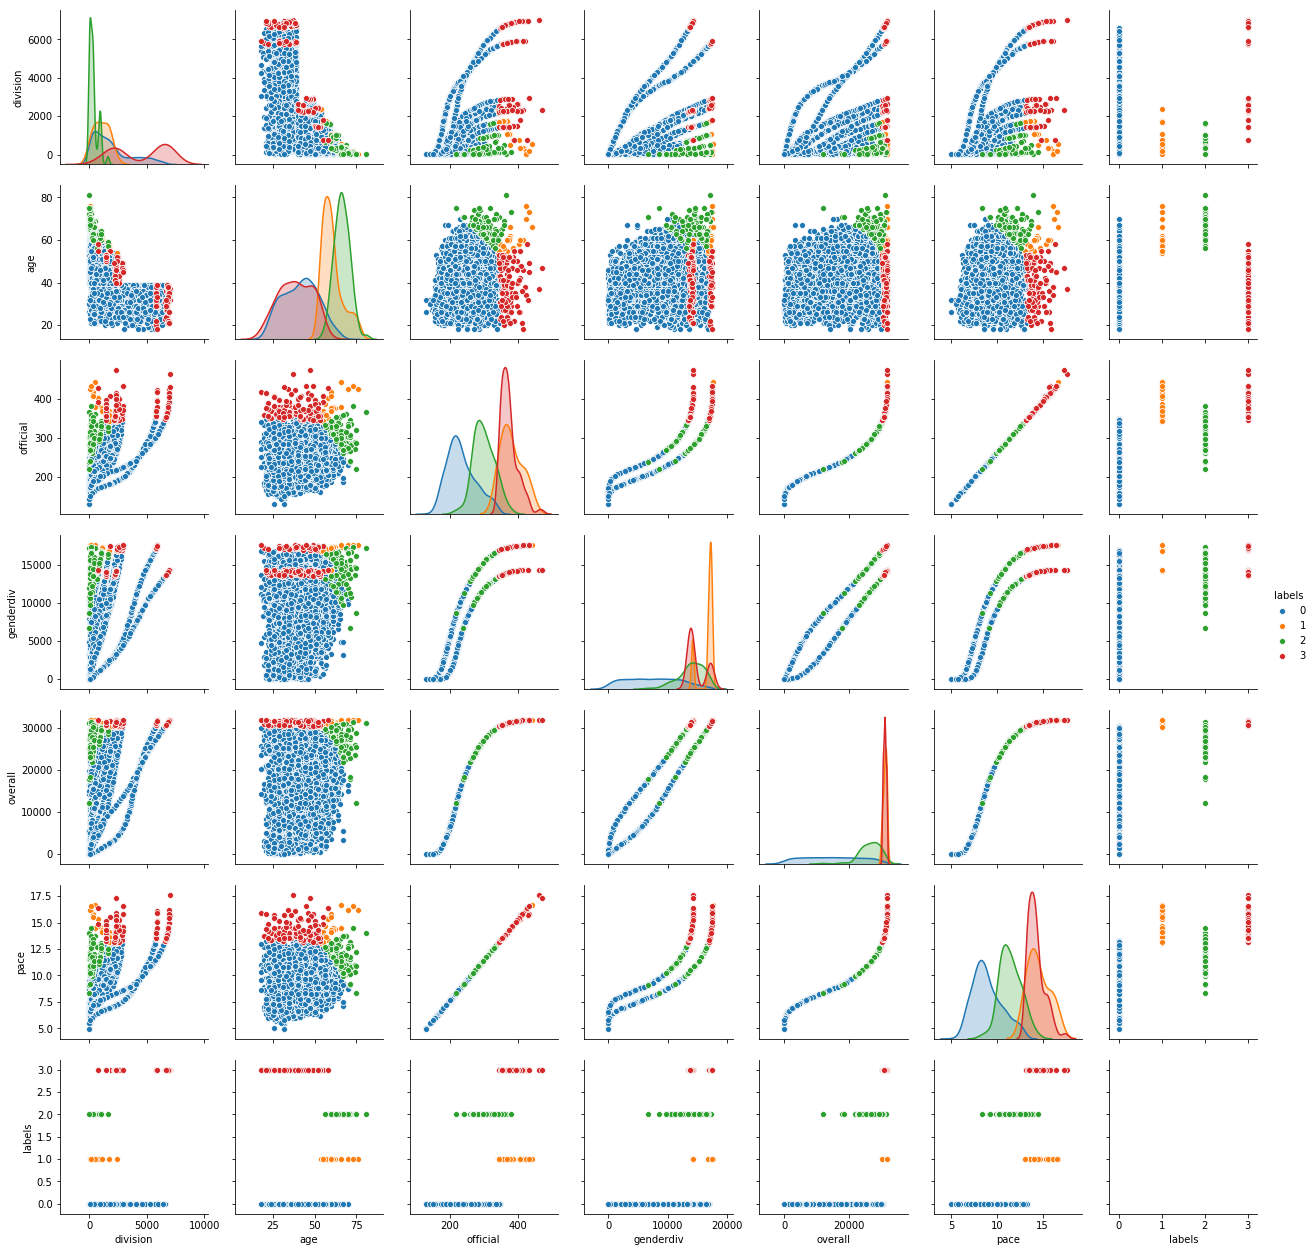

In [115]:
# g = sns.PairGrid(X)
# g = g.map(plt.scatter)
X['labels'] = labels
g = sns.pairplot(X, hue='labels')